In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Hybrid Weight Recommnedation System

In [7]:
df = pd.read_csv("movies_metadata.csv")

/var/folders/d5/yv3yty4s3y33ty4r_pc546j80000gn/T/ipykernel_71509/1650877637.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("movies_metadata.csv")


Contains 45466 rows of data with a lot of nulls in the home back section. Next we will drop the nulls to get a cleaner datset for recommendations.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [10]:
df.dropna( inplace = True )

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693 entries, 9 to 45029
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  693 non-null    object 
 1   belongs_to_collection  693 non-null    object 
 2   budget                 693 non-null    object 
 3   genres                 693 non-null    object 
 4   homepage               693 non-null    object 
 5   id                     693 non-null    object 
 6   imdb_id                693 non-null    object 
 7   original_language      693 non-null    object 
 8   original_title         693 non-null    object 
 9   overview               693 non-null    object 
 10  popularity             693 non-null    object 
 11  poster_path            693 non-null    object 
 12  production_companies   693 non-null    object 
 13  production_countries   693 non-null    object 
 14  release_date           693 non-null    object 
 15  reve

In [20]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,weight
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,6.394964
68,False,"{'id': 43563, 'name': 'Friday Collection', 'po...",3500000,"[{'id': 35, 'name': 'Comedy'}]",http://www.newline.com/properties/friday.html,10634,tt0113118,en,Friday,Craig and Smokey are two guys in Los Angeles h...,...,28215918.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A lot can go down between thursday and saturda...,Friday,False,7.0,513.0,6.421321
69,False,"{'id': 10924, 'name': 'From Dusk Till Dawn Col...",19000000,"[{'id': 27, 'name': 'Horror'}, {'id': 28, 'nam...",http://www.miramax.com/movie/from-dusk-till-dawn/,755,tt0116367,en,From Dusk Till Dawn,Seth Gecko and his younger brother Richard are...,...,25836616.0,108.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,One night is all that stands between them and ...,From Dusk Till Dawn,False,6.9,1644.0,6.556749
153,False,"{'id': 439053, 'name': 'Brooklyn Cigar Store C...",2000000,"[{'id': 35, 'name': 'Comedy'}]",http://miramax.com/movie/blue-in-the-face/,5894,tt0112541,en,Blue in the Face,"Auggie runs a small tobacco shop in Brooklyn, ...",...,1275000.0,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Welcome to the planet Brooklyn.,Blue in the Face,False,6.8,28.0,6.278391
178,False,"{'id': 286162, 'name': 'Power Rangers Collecti...",15000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.powerrangers.com/,9070,tt0113820,en,Mighty Morphin Power Rangers: The Movie,Power up with six incredible teens who out-man...,...,66000000.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Power Is On!,Mighty Morphin Power Rangers: The Movie,False,5.2,153.0,6.193985


# Computing the weights 
 - Here we will use the weighted hybrid technique
    - Weighted hybrid takes in the users personal information and favors the variables that best fit the user to give a best recommendation 
    
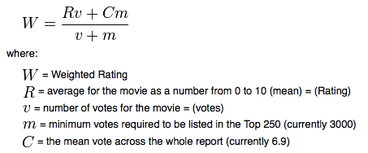

Here we obtained the values needed to compute the weight rating. Getting the bottonm 70% of the data in m.

In [13]:
v = df['vote_count']
R = df['vote_average']
C = df['vote_average'].mean()
#Obtaining the top 30 % of votes
m = df['vote_count'].quantile(.7)

Now we have to compute the average weight using the formula above to assign as a new column for computation 

In [14]:
df['weight'] = ((R*v) + (C * m)) / (v + m)

Next we have to sort the movies based on weight. This will make it so when we go and suggest the movies based on the desired magnitude.

In [15]:
sorted_ranking = df.sort_values('weight', ascending = False)

In [17]:
sorted_ranking[['original_title', 'vote_count', 'vote_average', 'weight', 'popularity']].head(10)


,original_title,vote_count,vote_average,weight,popularity
12481,The Dark Knight,12269.0,8.3,8.018693,123.167259
834,The Godfather,6024.0,8.5,7.949688,41.109264
7000,The Lord of the Rings: The Return of the King,8226.0,8.1,7.745918,29.324358
1154,The Empire Strikes Back,5998.0,8.2,7.722201,19.470959
256,Star Wars,6778.0,8.1,7.687341,42.149697
4863,The Lord of the Rings: The Fellowship of the Ring,8892.0,8.0,7.685792,32.070725
5814,The Lord of the Rings: The Two Towers,7641.0,8.0,7.644914,29.423537
23753,Guardians of the Galaxy,10014.0,7.9,7.631670,53.291601
2458,The Matrix,9079.0,7.9,7.608973,33.366332
1225,Back to the Future,6239.0,8.0,7.584305,25.778509


From this bar plot we can see that the Dark Knight is the top recommended movie for the observations taken in. 

Text(0, 0.5, 'Movie Title')

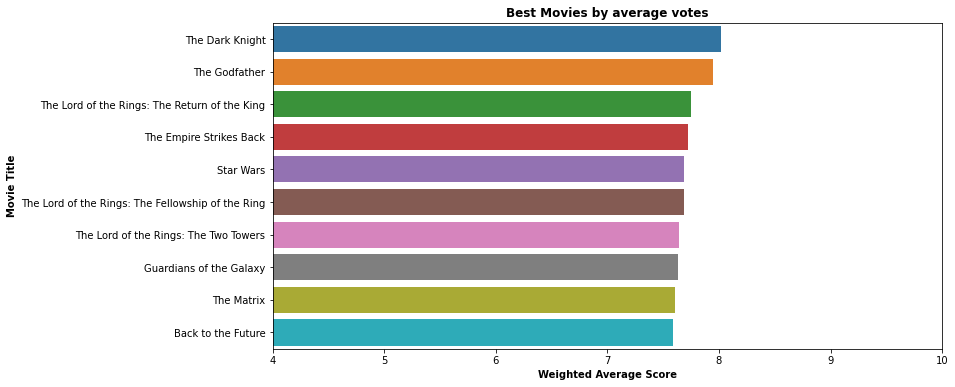

In [19]:
weight_avg=sorted_ranking.sort_values('weight',ascending=False)
plt.figure(figsize=(12,6))
axis1=sns.barplot(x=weight_avg['weight'].head(10), y=weight_avg['original_title'].head(10), data=weight_avg)
plt.xlim(4, 10)
plt.title('Best Movies by average votes', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')
#plt.savefig('best_movies.png')